**Supervivencia del Titanic**

La base de datos AED_Titanic.csv se corresponde con información relativa a los pasajeros del Titanic. En ella se determina información de las siguientes variables: 


*   Survived: Supervivencia (0 = No; 1 = Sí)
*   Pclass: Clase del Pasajero (1 = 1ª clase; 2 = 2ª clase; 3 = 3ª clase)
*   Sex: Sexo (female = mujer, male = hombre)
*   Age: Edad
*   Sibsp: número de hermanos o cónyuges a bordo
*   Parch: número de padres o hijos a bordo
*   Fare: Tarifa de pasajero (en libras esterlinas)
*   Embarked: Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)

Se desea conocer el mejor conjunto de variables que predicen la supervivencia de los pasajeros del Titanic.

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting the data 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from subprocess import check_output

In [8]:
data = pd.read_csv('AED_Titanic.csv') 
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Visualización de datos

Sexo versus Supervivencia (survival)

          male  female
Total      577     312
Survived   109     231
Died       468      81


<AxesSubplot: >

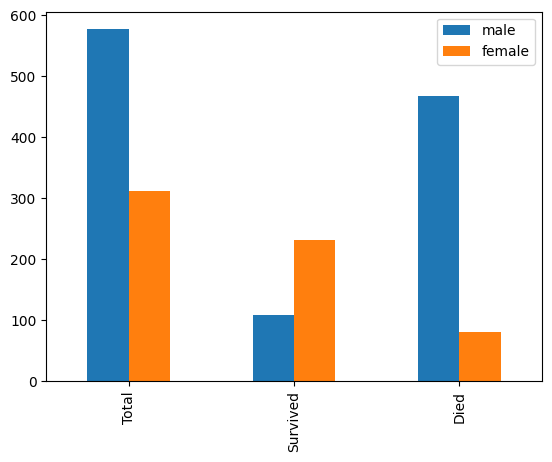

In [9]:
total = data['Sex'].value_counts()
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
died_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([total,survived_sex,died_sex])
df.index = ['Total','Survived','Died']
print(df)
df.plot(kind='bar')

Age vs Survival

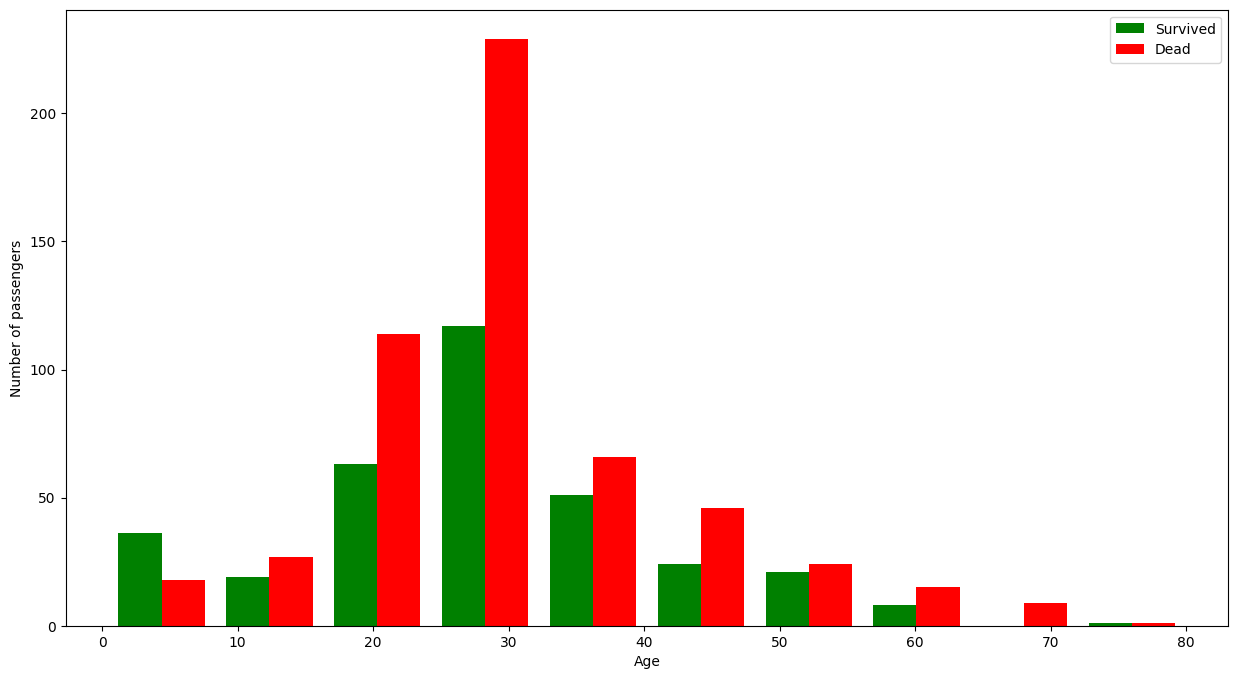

In [10]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']], color = ['g','r'],
         bins = 10,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

Class versus Survival

             1    0  total
1st class  134   80    214
2nd class   87   97    184
3rd class  119  372    491


<AxesSubplot: >

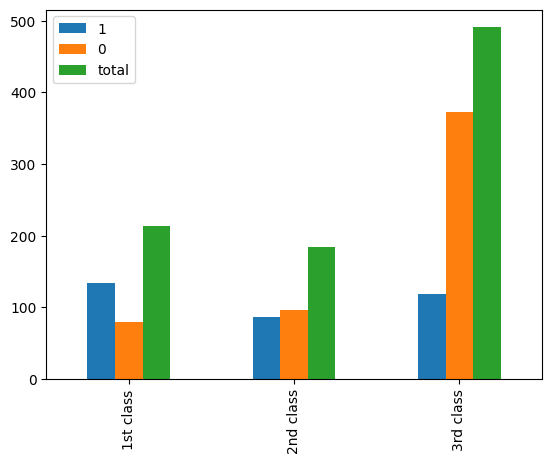

In [11]:
survived_1 = data[data['Pclass']==1]['Survived'].value_counts()
survived_2 = data[data['Pclass']==2]['Survived'].value_counts()
survived_3 = data[data['Pclass']==3]['Survived'].value_counts()
df = pd.DataFrame([survived_1,survived_2,survived_3])
df['total']=df[0]+df[1]
df.index = ['1st class','2nd class','3rd class']
df.rename(index=str,columns={0:'Survived',1:'Died'})
print (df)
df.plot(kind='bar',label=['Survived','Died'])

Fare versus Survival

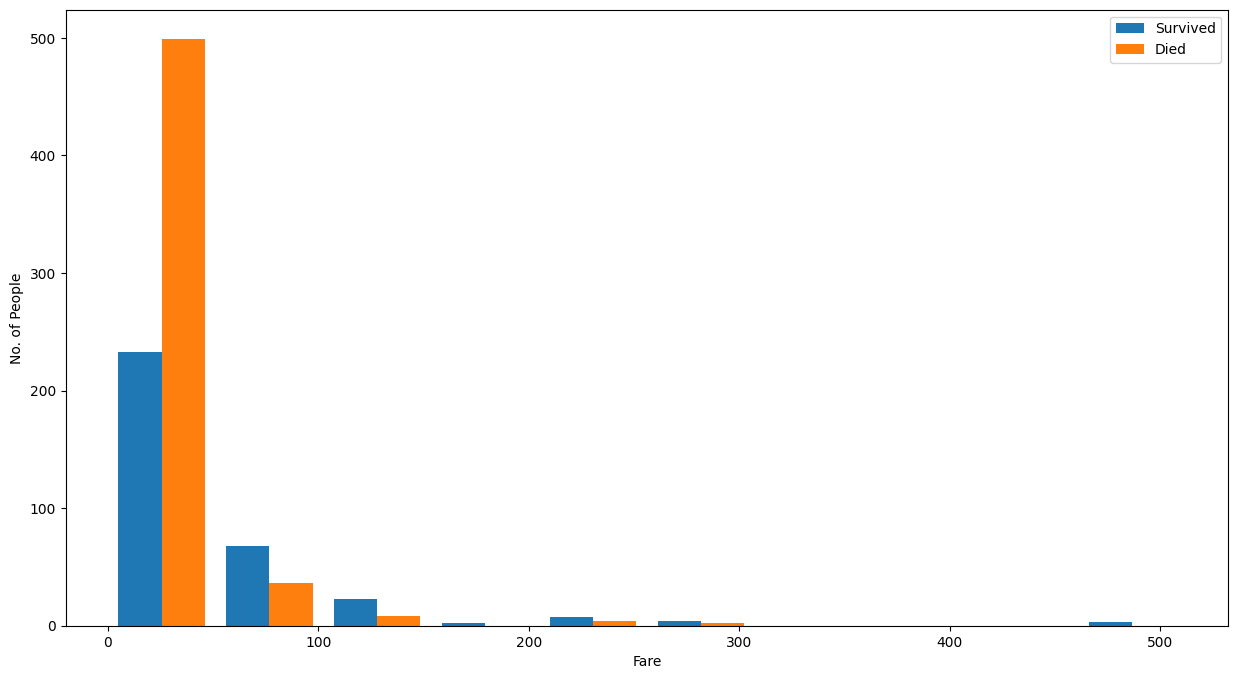

In [12]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']],bins=10,label=['Survived','Died'])
plt.xlabel('Fare')
plt.ylabel('No. of People')
plt.legend()

Embarkment versus Survival

<AxesSubplot: >

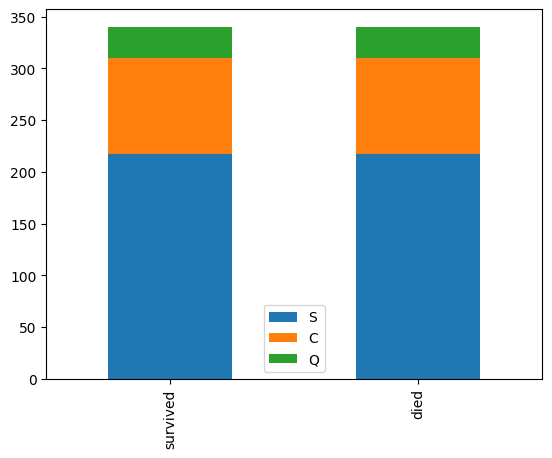

In [13]:
survived_embarkment  = data[data['Survived']==1]['Embarked'].value_counts()
died_embarkment = data[data['Survived']==1]['Embarked'].value_counts()
df = pd.DataFrame([survived_embarkment,died_embarkment])
df.index=['survived','died']
df.plot(kind='bar',stacked=True)

Codificación de variables categóricas a ficticias (dummies)

In [14]:
data.dtypes
data.info()
print(data['Embarked'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB
0      S
1      C
2      S
3      S
4      S
      ..
884    S
885    S
886    S
887    C
888    Q
Name: Embarked, Length: 889, dtype: object


In [15]:
## Convertimos las variables categóricas a dummy
data['Sex'] = pd.get_dummies(data['Sex'], drop_first=True)
data['Sex'] 

0      1
1      0
2      0
3      0
4      1
      ..
884    1
885    0
886    0
887    1
888    1
Name: Sex, Length: 889, dtype: uint8

In [16]:
Embark2 = pd.get_dummies(data['Embarked'], drop_first=True)
Embark2


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
884,0,1
885,0,1
886,0,1
887,0,0


In [17]:
df = pd.concat([data['Pclass'],data['Sex'],data['Age'],data['SibSp'], data['Parch'], data['Fare'], Embark2], axis=1)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22.000000,1,0,7.2500,0,1
1,1,0,38.000000,1,0,71.2833,0,0
2,3,0,26.000000,0,0,7.9250,0,1
3,1,0,35.000000,1,0,53.1000,0,1
4,3,1,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
884,2,1,27.000000,0,0,13.0000,0,1
885,1,0,19.000000,0,0,30.0000,0,1
886,3,0,29.699118,1,2,23.4500,0,1
887,1,1,26.000000,0,0,30.0000,0,0


In [24]:
X = df
y = data['Survived']
Xtrain = df.head(800)
Xtest = df.tail(89)
ytrain = y.head(800)
ytest = y.tail(89)

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='none',  max_iter=10000).fit(Xtrain,ytrain)
logreg
print("Precisión del conjunto de entrenamiento: {:.3f}".format(logreg.score(Xtrain,ytrain)))
print("Precisión del conjunto de prueba: {:.3f}".format(logreg.score(Xtest,ytest)))

Precisión del conjunto de entrenamiento: 0.796
Precisión del conjunto de prueba: 0.843


In [27]:
df = pd.concat([data['Pclass'],data['Sex'],data['Age'],data['SibSp'], data['Parch'], data['Fare']], axis=1)
X = df
y = data['Survived']
Xtrain = df.head(800)
Xtest = df.tail(89)
ytrain = y.head(800)
ytest = y.tail(89)

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='none', random_state=0,).fit(Xtrain,ytrain)
logreg
print("Precisión del conjunto de entrenamiento: {:.3f}".format(logreg.score(Xtrain,ytrain)))
print("Precisión del conjunto de prueba: {:.3f}".format(logreg.score(Xtest,ytest)))

Precisión del conjunto de entrenamiento: 0.797
Precisión del conjunto de prueba: 0.809


In [29]:
import statsmodels.api as sm
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
Xtrain = sm.add_constant(Xtrain, prepend=True)
modelo2 = sm.Logit(ytrain, Xtrain)
modelo2 = modelo2.fit()
print(modelo2.summary())

Optimization terminated successfully.
         Current function value: 0.444736
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  800
Model:                          Logit   Df Residuals:                      793
Method:                           MLE   Df Model:                            6
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                  0.3321
Time:                        20:48:41   Log-Likelihood:                -355.79
converged:                       True   LL-Null:                       -532.70
Covariance Type:            nonrobust   LLR p-value:                 2.341e-73
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8823      0.561      8.705      0.000       3.783       5.982
Pclass        -1.0712      0.

In [30]:
df = pd.concat([data['Pclass'],data['Sex'],data['Age'],data['SibSp']], axis=1)
X = df
y = data['Survived']
Xtrain = df.head(800)
Xtest = df.tail(89)
ytrain = y.head(800)
ytest = y.tail(89)

In [31]:
import statsmodels.api as sm
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
Xtrain = sm.add_constant(Xtrain, prepend=True)
modelo2 = sm.Logit(ytrain, Xtrain)
modelo2 = modelo2.fit()
print(modelo2.summary())

Optimization terminated successfully.
         Current function value: 0.445897
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  800
Model:                          Logit   Df Residuals:                      795
Method:                           MLE   Df Model:                            4
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                  0.3304
Time:                        20:49:53   Log-Likelihood:                -356.72
converged:                       True   LL-Null:                       -532.70
Covariance Type:            nonrobust   LLR p-value:                 6.627e-75
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0560      0.501     10.086      0.000       4.073       6.039
Pclass        -1.1439      0.